In [23]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [24]:
"""KMEANS CLUSTERING — STEP 0 (OVERVIEW)
🎯 Goal of This Project

The goal of this project is to group similar data points into clusters using KMeans clustering and understand the natural structure present in the data 
without using any target variable.
Problem Type

Type: Unsupervised Learning
Why:
There is no target (y)
The model finds patterns on its own

Dataset Used

Dataset: Diabetes dataset from sklearn
Data Used: Only feature columns
Target Column: ❌ Not used
This mimics real-world clustering problems where labels are unavailable.

Algorithm Used
KMeans Clustering

KMeans is an unsupervised algorithm that groups data into K clusters based on similarity (distance).
Key ideas:
K = number of clusters (chosen manually)
Each data point belongs to the nearest cluster
Cluster centers are updated iteratively

Evaluation Approach
Since clustering has no correct answers, we evaluate using:
Elbow Method → helps choose optimal K
Silhouette Score → measures cluster quality
(Not accuracy, precision, or RMSE)
"""

'KMEANS CLUSTERING — STEP 0 (OVERVIEW)\n🎯 Goal of This Project\n\nThe goal of this project is to group similar data points into clusters using KMeans clustering and understand the natural structure present in the data \nwithout using any target variable.\nProblem Type\n\nType: Unsupervised Learning\nWhy:\nThere is no target (y)\nThe model finds patterns on its own\n\nDataset Used\n\nDataset: Diabetes dataset from sklearn\nData Used: Only feature columns\nTarget Column: ❌ Not used\nThis mimics real-world clustering problems where labels are unavailable.\n\nAlgorithm Used\nKMeans Clustering\n\nKMeans is an unsupervised algorithm that groups data into K clusters based on similarity (distance).\nKey ideas:\nK = number of clusters (chosen manually)\nEach data point belongs to the nearest cluster\nCluster centers are updated iteratively\n\nEvaluation Approach\nSince clustering has no correct answers, we evaluate using:\nElbow Method → helps choose optimal K\nSilhouette Score → measures clust

In [25]:
# step 1 - import libraries and load dataset
from sklearn.datasets import load_diabetes
import pandas as pd

data=load_diabetes(as_frame=True)
df=data.frame

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [26]:
# select only features
X = df.drop("target", axis=1)

In [27]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [28]:
# step 2 - feature scaling
"""Scale all features so that no single feature dominates the distance calculation.

KMeans works using distance, so scaling is required."""

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.80050009,  1.06548848,  1.29708846,  0.45984057, -0.92974581,
        -0.73206462, -0.91245053, -0.05449919,  0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, -0.55350458, -0.17762425,
        -0.40288615,  1.56441355, -0.83030083, -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, -0.1192138 , -0.95867356,
        -0.71889748, -0.68024452, -0.05449919,  0.06015558, -0.54515416],
       [-1.87244107, -0.93853666, -0.24377122, -0.77064997,  0.25629203,
         0.52539714, -0.75764652,  0.72130245,  0.47698252, -0.19682291],
       [ 0.11317236, -0.93853666, -0.76494435,  0.45984057,  0.08272552,
         0.32789006,  0.17117751, -0.05449919, -0.67250161, -0.98056821]])

In [29]:
"""KMEANS CLUSTERING — STEP 3
Choose Number of Clusters (Elbow Method)
🎯 Goal of Step 3

Decide how many clusters (K) we should use.

In clustering:
We must choose K
Elbow method helps us choose it logically

🧠 What Is the Elbow Method? (Very Easy)

For different values of K:
Run KMeans
Measure how compact the clusters are
This compactness is called inertia
(lower inertia = tighter clusters)

We:
Plot K vs inertia
Look for a point where improvement slows down
👉 that bend is the elbow"""

from sklearn.cluster import KMeans

inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)


In [30]:
#STEP 4 — Fit KMeans & Assign Clusters.
"""Goal of Step 4

Train KMeans with the chosen number of clusters (K) and assign each data point to a cluster.

Now clustering actually happens."""

k=3
#step 4.2 create and fit KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

clusters = kmeans.fit_predict(X_scaled)

"""What’s happening here (easy)

KMeans is trained on scaled data

Each data point is assigned a cluster label

clusters is an array like:"""

#STEP 4.3 — Attach Clusters to Data
df["cluster"] = clusters
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,cluster
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,2
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,2
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,2
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,0


In [31]:
df["cluster"].value_counts()

cluster
0    161
2    156
1    125
Name: count, dtype: int64

In [32]:
#Memory Rule

#KMeans assigns each data point to the nearest cluster center.

Matplotlib is building the font cache; this may take a moment.


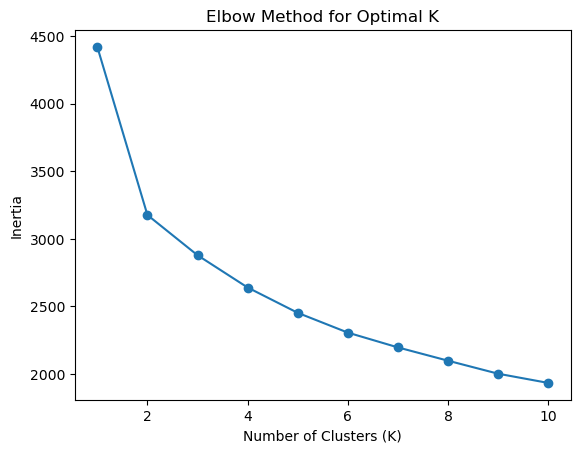

In [33]:
#STEP 5 — Plot Elbow Curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia_values, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [34]:
#STEP 5 — Evaluate Clusters using Silhouette Score.
"""Goal of Step 5

Measure how good the clustering is.

What Is Silhouette Score? (VERY EASY)

Silhouette Score tells how well a data point fits into its own cluster compared to other clusters.
In simple words:
Are points close to their own cluster?
And far from other clusters?

Silhouette Score Range
Value	Meaning
+1	Very good clustering
~0	Overlapping clusters
< 0	Wrong clustering

Rule of thumb:

> 0.5 → good
0.25 – 0.5 → reasonable
< 0.25 → weak
"""
#STEP 5.1 — Calculate Silhouette Score
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, clusters)
sil_score


0.15308671416921715

In [35]:
#Scaling makes distances fair, elbow chooses how many clusters, silhouette checks how good those clusters are.

"""
| Step   | Purpose                 |
| ------ | ----------------------- |
| Step 1 | Load data               |
| Step 2 | Remove target           |
| Step 3 | Make distances fair     |
| Step 4 | Try different K         |
| Step 5 | Pick best K             |
| Step 6 | Train KMeans            |
| Step 7 | Assign clusters         |
| Step 8 | Check cluster sizes     |
| Step 9 | Measure cluster quality |

"""

'\n| Step   | Purpose                 |\n| ------ | ----------------------- |\n| Step 1 | Load data               |\n| Step 2 | Remove target           |\n| Step 3 | Make distances fair     |\n| Step 4 | Try different K         |\n| Step 5 | Pick best K             |\n| Step 6 | Train KMeans            |\n| Step 7 | Assign clusters         |\n| Step 8 | Check cluster sizes     |\n| Step 9 | Measure cluster quality |\n\n'